C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

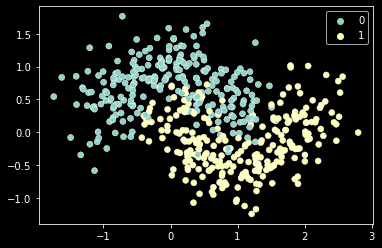

In [7]:
from sklearn.datasets import make_moons
import seaborn as sns
# 데이터 생성
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
# 산점도
sns.scatterplot(X[:,0],X[:,1], y)

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 학습 / 검증 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델생성
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print("배깅 accuracy :",accuracy_score(y_test, y_pred))

배깅 accuracy : 0.904


In [10]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("의사결정나무 accuracy :", accuracy_score(y_test, y_pred_tree))

의사결정나무 accuracy : 0.856


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#FFD8D8','#9898ff','#B2EBF4'])
    plt.contourf(x1, x2, y_pred, #alpha=0.3, 
                 cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, #alpha=0.8,
                    cmap=custom_cmap2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

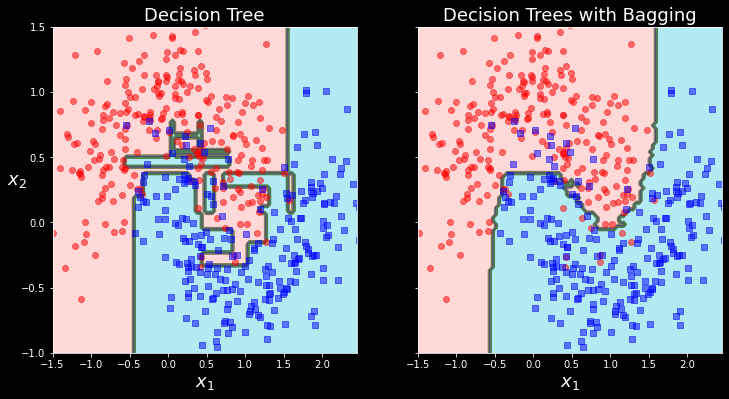

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=18)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=18)
plt.ylabel("")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [14]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [15]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # 거의 에측이 동일합니다.

0.976

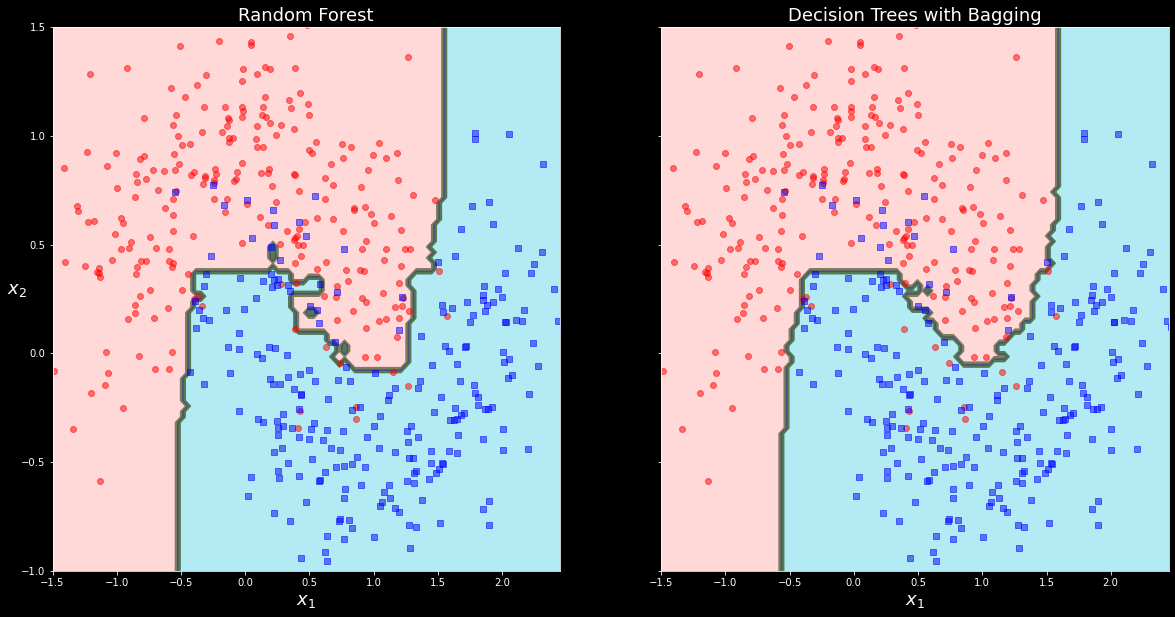

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=18)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=18)
plt.ylabel("")
plt.show()

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

# X, y 할당
X = iris["data"]
y = iris['target']

# Train, Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

랜덤포레스트 training accuracy  : 100.0 %
랜덤포레스트 test accuracy : 89.47368421052632 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38

--------------------------------------------------------------------------
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]
--------------------------------------------------------------------------
Execution time is:
0.4241459369659424


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '<< Random Forest >>')

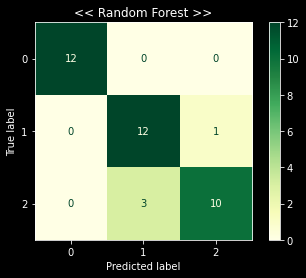

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
import time

start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_train, y_train)
rnd_clf_pred = rnd_clf.predict(X_test) #X_test 예측
rnd_clf_acc = rnd_clf.score(X_test, y_test ) # 정확도(Accuracy) 출력
#---------------------------------------------- 
print("랜덤포레스트 training accuracy  :", rnd_clf.score( X_train, y_train )*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test, rnd_clf_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, rnd_clf_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
plot_confusion_matrix(rnd_clf, X_test, y_test , cmap='YlGn')
plt.title("<< Random Forest >>")

['sepal length (cm)', 0.1219238899824993]
['sepal width (cm)', 0.028212457341966667]
['petal length (cm)', 0.44200866611709616]
['petal width (cm)', 0.40785498655843794]
['sepal length (cm)', 0.1219238899824993]
['sepal width (cm)', 0.028212457341966667]
['petal length (cm)', 0.44200866611709616]
['petal width (cm)', 0.40785498655843794]


Text(0.5, 1.0, 'Random forest_feature importance')

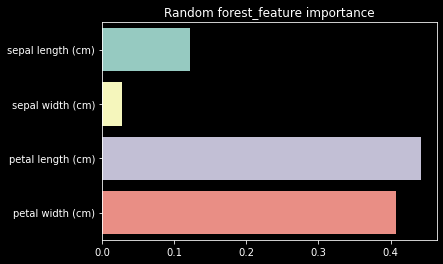

In [21]:
# 특성 중요도 출력
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print([name, score])

# 특성 중요도 시각화
sns.barplot(x=rnd_clf.feature_importances_, y=iris.feature_names)
plt.title("Random forest_feature importance")# 특성 중요도 출력
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print([name, score])

# 특성 중요도 시각화
sns.barplot(x=rnd_clf.feature_importances_, y=iris.feature_names)
plt.title("Random forest_feature importance")